In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [8]:
data = pd.read_csv("/config/workspace/Dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['SkinThickness'].mean())

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,89.800307,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,108.574766,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,20.536458,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

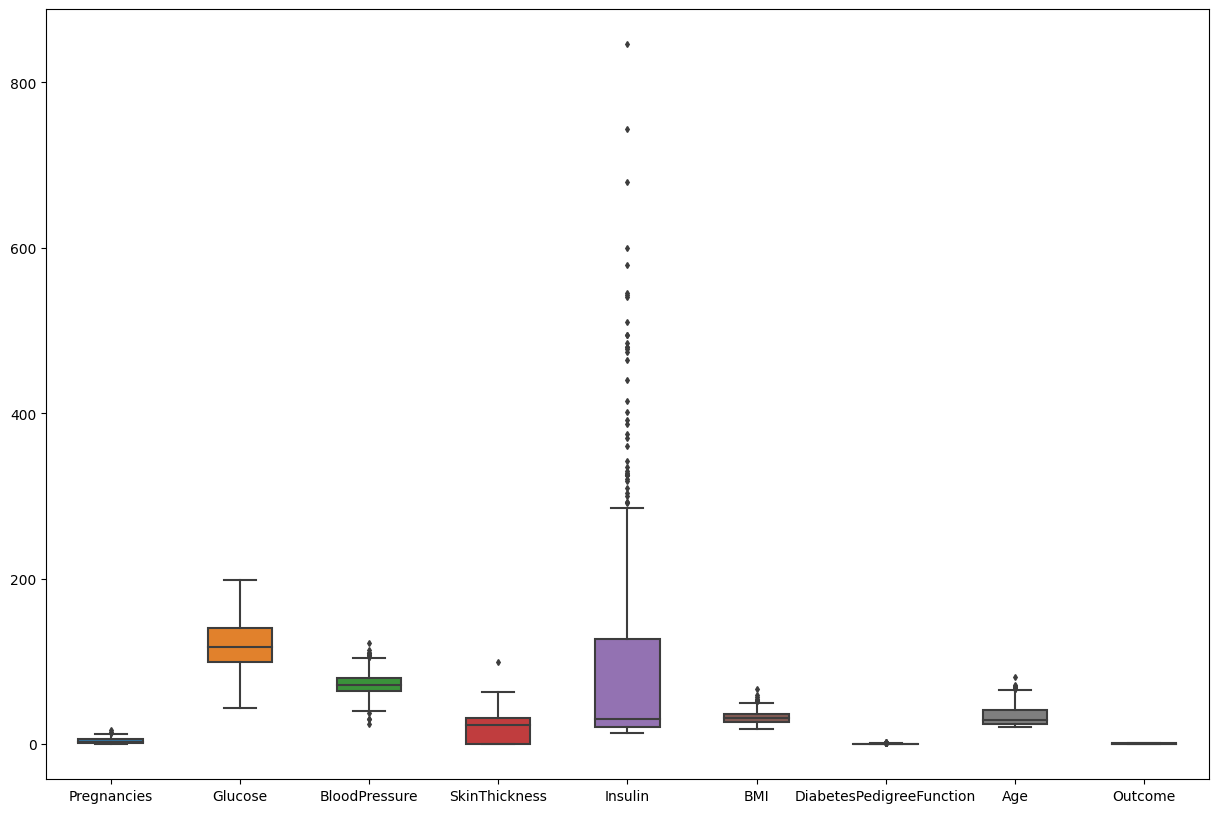

In [13]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,20.536458,33.6,0.627,50,1
1,1,85.0,66.0,29,20.536458,26.6,0.351,31,0
2,8,183.0,64.0,0,20.536458,23.3,0.672,32,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1


In [18]:
# segregate the dependent and independent variables
X= data.drop(columns=['Outcome'])
y=data['Outcome']

In [20]:
# seperate dataset into train and test
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [53]:
import pickle
# standard scalling - Standardization
def scaler_standard(X_train,X_test):
    #scalling the data
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Saving the model
    file = open('/config/workspace/Model/standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [68]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [69]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

#Decison tree model training with hyperparameter trainings

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
parameter={
    'criterion':['ginni','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
    }

In [72]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

In [73]:
clf = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy',verbose=3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=rando

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginni', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [74]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [75]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',splitter='random')

In [76]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       splitter='random')

In [90]:
# Support Vector Classifier with Hyperparameter Tunings
#defining parameter range
param_grid = {'C':[0.1,1,10,100,1000],
'gamma':[1,0.1,0.01,0.001,0.0001],
'kernel':['linear','rbf','polynomial']
}

In [92]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3,scoring='accuracy')
grid.fit(X_train,y_train)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.713 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.774 total time=   0.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

KeyboardInterrupt: 

In [95]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [97]:
svc_clf=SVC(C=0.1,gamma=1,kernel='linear')
svc_clf.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [77]:
# Decision tree Prediction
y_pred=classifier.predict(X_test_scaled)

In [99]:
# svc prediction
y_pred_svc=classifier.predict(X_test_scaled)

# accuracy = accuracy_scorely(y_test,y_pred)accuracy

In [78]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[126,   4],
       [ 55,   7]])

In [100]:
conf_mat=confusion_matrix(y_test,y_pred_svc)
conf_mat

array([[126,   4],
       [ 55,   7]])

In [101]:
Accuracy = (true_positive + true_negative) / (true_positive+false_positive+false_negative+true_negative)
Accuracy

0.6927083333333334

In [83]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative = conf_mat[1][1]

In [84]:
Accuracy = (true_positive + true_negative) / (true_positive+false_positive+false_negative+true_negative)
Accuracy

0.6927083333333334

In [85]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9692307692307692

In [86]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6961325966850829

In [87]:
F1_Score = 2*(Recall * Precision) / (Recall  + Precision)
F1_Score

0.8102893890675241

In [88]:
import pickle
file=open('/config/workspace/Model/modelForPrediction.pkl', 'wb')
pickle.dump(classifier,file)
file.close()

In [ ]:
# How to predict our lgorith with the help of naive bayes